In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import timedelta,datetime

In [5]:
from data.pull_data import pull_quandl_sample_data, pull_custom_sample_data

# For quandl
# ticker = 'CME_AD'
# data_df = pull_quandl_sample_data(ticker)


path = 'data/currency/EUR.csv'
data_df = pull_custom_sample_data(path)

In [6]:
from utils.postprocess import resolve_changepoints_from_path


# For quandl
# cpd_path = f'data/quandl_cpd_21lbw/{ticker}.csv'

cpd_path = 'data/currency_cpd_preload_params_21lbw_Matern12/EUR.csv'


changepoints = resolve_changepoints_from_path(cpd_path, thr=0.98, window=10)



Total number of changepoints is: 128


12 days, 0:00:00
20 days, 0:00:00
18 days, 0:00:00
2 days, 0:00:00
5 days, 0:00:00
20 days, 0:00:00
4 days, 0:00:00
1 day, 0:00:00
18 days, 0:00:00
2 days, 0:00:00


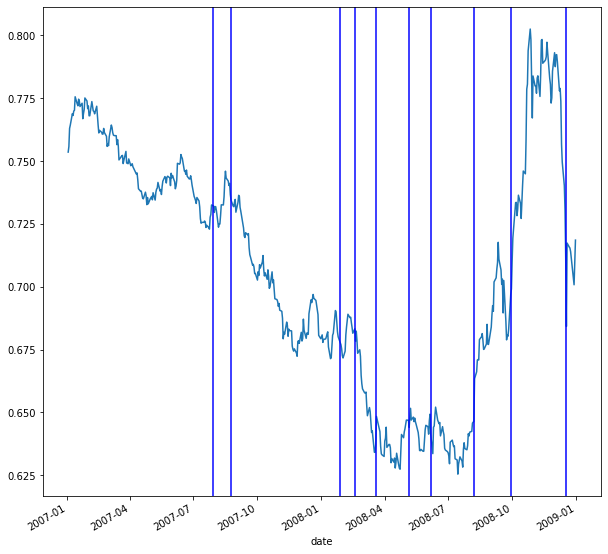

In [7]:
lower = datetime(2007, 1, 1)
upper = datetime(2009, 1, 1)
data_df['close'][lower: upper].plot(figsize=(10,10))
for date, cp, score in changepoints:
    if lower < cp < upper:
        # if date-cp < timedelta(1): continue
        print(date - cp)
        plt.axvline(x = cp, color = 'b', alpha = score)
        # plt.axvline(x = date, color = 'r', alpha = score)
